# Machine Learning-Based Analysis of Gene Expression Profiles in Breast Cancer  

**Mohamed Hussein**(Independent extension, model optimization, cross-validation implementation, and GitHub publication)  
**Date** 2025-09-29  


## Notebook 5 – Cross-Validation & Hyperparameter Tuning

This notebook focuses on model optimization through **cross-validation** and **hyperparameter tuning** using `GridSearchCV`.  
The aim is to identify the best-performing configurations for Random Forest and Support Vector Machine (SVM) models, improving predictive accuracy on the breast cancer gene expression dataset.  


## Workflow Overview: 
1. Load feature-selected training data  
2. Import required libraries  
3. Define cross-validation strategy  
4. Set hyperparameter grids for Random Forest and SVM  
5. Perform grid search to find optimal parameters  
6. Compare model performances and visualize results  
7. Save best models and summary outputs  


## 5.0 Load Feature-Selected Data  


In [6]:
import pickle                                            # For loading serialized data
import numpy as np                                       # Numerical computations

with open('X_train_selected.pkl', 'rb') as f:            # Load preprocessed training features
    X_train_selected = pickle.load(f)

with open('X_test_selected.pkl', 'rb') as f:             # Load preprocessed testing features
    X_test_selected = pickle.load(f)

with open('y_train.pkl', 'rb') as f:                     # Load training labels
    y_train = pickle.load(f)

with open('y_test.pkl', 'rb') as f:                      # Load testing labels
    y_test = pickle.load(f)

with open('selected_gene_names.pkl', 'rb') as f:         # Load selected gene names
    selected_gene_names = pickle.load(f)

print("Training data shape:", X_train_selected.shape)    # Confirm training feature dimensions
print("Test data shape:", X_test_selected.shape)         # Confirm testing feature dimensions
print("Number of selected genes:", len(selected_gene_names))  # Display total number of selected genes


Training data shape: (40, 50)
Test data shape: (18, 50)
Number of selected genes: 50


## 5.1 Import Required Libraries


In [8]:
import pandas as pd                                      # Data manipulation and result summary
import numpy as np                                       # Numerical operations
import matplotlib.pyplot as plt                          # Visualization
import seaborn as sns                                    # Statistical plotting
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # Cross-validation and grid search
from sklearn.ensemble import RandomForestClassifier       # Random Forest algorithm
from sklearn.svm import SVC                              # Support Vector Machine
import joblib                                            # Save best-trained models


## 5.2 Confirm Training Data Availability


In [10]:
print("Training data shape:", X_train_selected.shape)     # Confirm the training data used for tuning


Training data shape: (40, 50)


## 5.3 Define Cross-Validation Strategy


In [12]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV with class balance


## 5.4 Define Hyperparameter Grids


In [14]:
rf_param_grid = {                                        # Random Forest parameter search space
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_param_grid = {                                       # SVM parameter search space
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}



## 5.5 Random Forest Grid Search


In [16]:
rf = RandomForestClassifier(random_state=42)              # Initialize Random Forest model
rf_grid = GridSearchCV(                                   # Apply GridSearchCV for hyperparameter tuning
    estimator=rf,
    param_grid=rf_param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train_selected, y_train)                    # Fit grid search on training data

print("Best RF Parameters:", rf_grid.best_params_)        # Display best parameters
print("Best RF Cross-Validation Accuracy:", rf_grid.best_score_)  # Display best accuracy

joblib.dump(rf_grid.best_estimator_, 'best_RF_model.pkl') # Save best RF model



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Cross-Validation Accuracy: 1.0


['best_RF_model.pkl']

## 5.6 SVM Grid Search


In [18]:
svm = SVC(probability=True, random_state=42)              # Initialize SVM model
svm_grid = GridSearchCV(                                  # Apply GridSearchCV for SVM
    estimator=svm,
    param_grid=svm_param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

svm_grid.fit(X_train_selected, y_train)                   # Fit grid search on training data

print("Best SVM Parameters:", svm_grid.best_params_)      # Display best parameters
print("Best SVM Cross-Validation Accuracy:", svm_grid.best_score_)  # Display best accuracy

joblib.dump(svm_grid.best_estimator_, 'best_SVM_model.pkl')  # Save best SVM model



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Cross-Validation Accuracy: 1.0


['best_SVM_model.pkl']

## 5.7 Compare Model Performances


C:\Users\space\AppData\Local\Temp\ipykernel_21520\3399083656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Best CV Accuracy', data=results, palette='coolwarm')  # Visualization


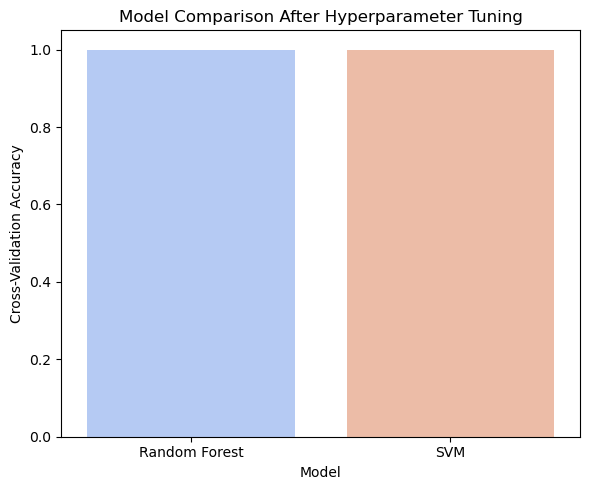

In [20]:
results = pd.DataFrame({                                  # Create comparison table for models
    'Model': ['Random Forest', 'SVM'],
    'Best CV Accuracy': [rf_grid.best_score_, svm_grid.best_score_]
})

plt.figure(figsize=(6, 5))
sns.barplot(x='Model', y='Best CV Accuracy', data=results, palette='coolwarm')  # Visualization
plt.title('Model Comparison After Hyperparameter Tuning')
plt.ylabel('Cross-Validation Accuracy')
plt.tight_layout()
plt.savefig('model_comparison_cv.png', dpi=300)           # Save comparison plot
plt.show()


## 5.8 Save Results Summary


In [22]:
results.to_csv('cv_model_performance_summary.csv', index=False)   # Save performance summary

print("\n Cross-validation and hyperparameter tuning completed successfully!")  # Final message


 Cross-validation and hyperparameter tuning completed successfully!


### Export Notebook 5 to HTML


In [24]:

!jupyter nbconvert --to html --embed-images "Notebook_5_CrossValidation_Hyperparameter_Tuning.ipynb" --output "Notebook_5_CrossValidation_Hyperparameter_Tuning.html"

[NbConvertApp] Converting notebook Notebook_5_CrossValidation_Hyperparameter_Tuning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 331689 bytes to Notebook_5_CrossValidation_Hyperparameter_Tuning.html
